In [2]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as fit
sys.path.append("../")
from analysis import System

In [3]:
laser = System("sagnac", ["../../data/20241014/Signal_Pin_10_12/iter_" + str(i) + ".tdms" for i in range(0, 101)] + ["../../data/20241014/Signal_Pin_29_37/iter_" + str(i) + ".tdms" for i in range(17, 102)] + ["../../data/20241014/Signal_Pin_60_51/iter_" + str(i) + ".tdms" for i in range(0, 103)] + ["../../data/20241014/Signal_Pin_124_22/iter_" + str(i) + ".tdms" for i in range(0, 102)], set_data = True, channel = "Y")

In [4]:
def sin_40khz(t, Ampl, phase, freq):
    return np.abs(Ampl) * np.sin(freq * 2 * np.pi * t - phase)
amplitudes = []
phase_diff = []
freqs = []
for i, d in enumerate(laser.get_data()):
    amps = np.array([])
    phase = np.array([])
    freq = np.array([])
    d.apply("detrend", mode = "linear", inplace = True)
    popt, pcov = fit(sin_40khz, d.collection[0].t, d.collection[0].x, [0.02, 0, 4e4], bounds = ([0.005, -2 * np.pi, 3.95e4], [2, 2 * np.pi, 4.05e4]))
    # popt, pcov = fit(sin_40khz, d.collection[0].t, d.collection[0].x, [0.0216, 0, 4e4], bounds = ([0.02, -2 * np.pi, 3.95e4], [0.03, 2 * np.pi, 4.05e4]))
    amps = np.append(amps, popt[0])
    phase = np.append(phase, popt[1])
    freq = np.append(freq, popt[2])
    popt, pcov = fit(sin_40khz, d.collection[1].t, d.collection[1].x, [0.02, 0, 4e4], bounds = ([0.005, -2 * np.pi, 3.95e4], [2, 2 * np.pi, 4.05e4]))
    # popt, pcov = fit(sin_40khz, d.collection[1].t, d.collection[1].x, [0.025, 0, 4e4], bounds = ([0.02, -2 * np.pi, 3.95e4], [0.03, 2 * np.pi, 4.05e4]))
    amps = np.append(amps, popt[0])
    phase = np.append(phase, popt[1])
    freq = np.append(freq, popt[2])
    amplitudes.append(amps)
    phase_diff.append(phase % (2 * np.pi) / (2 * np.pi) * (1 / 4e4))
    freqs.append(freq)
    laser.set_data(ind = i)

In [5]:
cols = np.array([])
for i in range(len(laser.get_data())):
    # fig, ax = plt.subplots(1, 1)
    laser.set_data(ind = i, tmin = phase_diff[i][0])
    laser.get_data()[i].apply("detrend", mode = "linear", inplace = True)
    col1 = laser.get_data()[i].collection[0]
    laser.set_data(ind = i)
    laser.set_data(ind = i, tmin = phase_diff[i][1])
    laser.get_data()[i].apply("detrend", mode = "linear", inplace = True)
    col2 = laser.get_data()[i].collection[1]
    cols = np.append(cols, col1)
    cols = np.append(cols, col2)
    laser.set_data(ind = i)
    # ax.plot(col1.t, col1.x)
    # ax.plot(col2.t, col2.x)
    # ax.plot(col1.t, sin_40khz(col1.t, amplitudes[i][0], phase_diff[i][0], freqs[i][0]))
    # print("Amplitude 1:", amplitudes[i][0])
    # print("Amplitude 2:", amplitudes[i][1])
    # ax.plot(col2.t, sin_40khz(col2.t, amplitudes[i][1], phase_diff[i][1], freqs[i][1]))
    # fig.show()
    # plt.show()

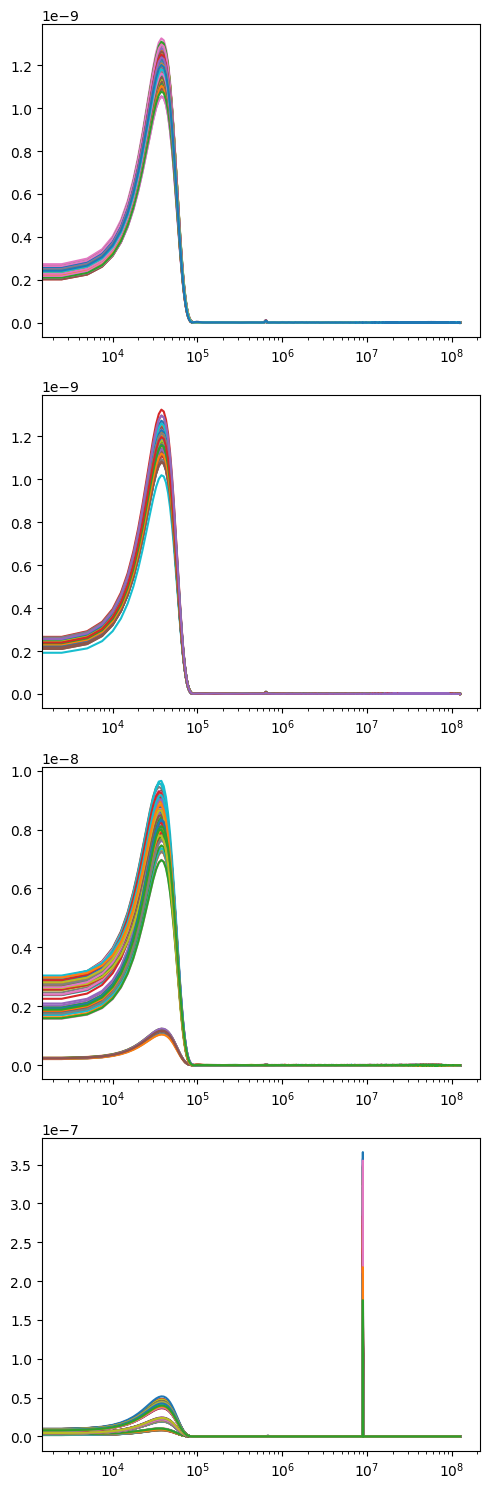

In [6]:
fig, ax = plt.subplots(4, 1, figsize = (5, 15))
from scipy.signal import welch
for i in range(len(cols)):
    f, x = welch(cols[i].x, 250000000, nperseg = 10000, nfft = 100000)
    if i < 101:
        ax[0].plot(f, x)
    elif i < 186:
        ax[1].plot(f, x)
    elif i < 289:
        ax[2].plot(f, x)
    else:
        ax[3].plot(f, x)
ax[0].set_xscale("log")
ax[1].set_xscale("log")
ax[2].set_xscale("log")
ax[3].set_xscale("log")
# ax[0].set_xlim(3e3, 5e5)
# ax[1].set_xlim(3e3, 5e5)
# ax[2].set_xlim(3e3, 5e5)
# ax[3].set_xlim(3e3, 5e5)
# ax[3].set_ylim(-0.5e-8, 6e-8)
plt.tight_layout()
plt.show()

In [7]:
noise = System("noise", ["../../data/20241014/Noise_Pin_10_12/iter_" + str(i) + ".tdms" for i in range(0, 102)] + ["../../data/20241014/Noise_Pin_29_37/iter_" + str(i) + ".tdms" for i in range(122, 185)] + ["../../data/20241014/Noise_Pin_60_51/iter_" + str(i) + ".tdms" for i in range(0, 102)] + ["../../data/20241014/Noise_Pin_124_22/iter_" + str(i) + ".tdms" for i in range(0, 104)], set_data = True, channel = "Y")

In [8]:
n_cols = np.array([])
for i in range(len(noise.get_data())):
    # fig, ax = plt.subplots(1, 1)
    noise.set_data(ind = i, tmin = phase_diff[i][0])
    noise.get_data()[i].apply("detrend", mode = "linear", inplace = True)
    col1 = noise.get_data()[i].collection[0]
    noise.set_data(ind = i)
    noise.set_data(ind = i, tmin = phase_diff[i][1])
    noise.get_data()[i].apply("detrend", mode = "linear", inplace = True)
    col2 = noise.get_data()[i].collection[1]
    n_cols = np.append(n_cols, col1)
    n_cols = np.append(n_cols, col2)
    noise.set_data(ind = i)
    # ax.plot(col1.t, col1.x)
    # ax.plot(col2.t, col2.x)
    # ax.plot(col1.t, sin_40khz(col1.t, amplitudes[i][0], phase_diff[i][0], freqs[i][0]))
    # print("Amplitude 1:", amplitudes[i][0])
    # print("Amplitude 2:", amplitudes[i][1])
    # ax.plot(col2.t, sin_40khz(col2.t, amplitudes[i][1], phase_diff[i][1], freqs[i][1]))
    # fig.show()
    # plt.show()

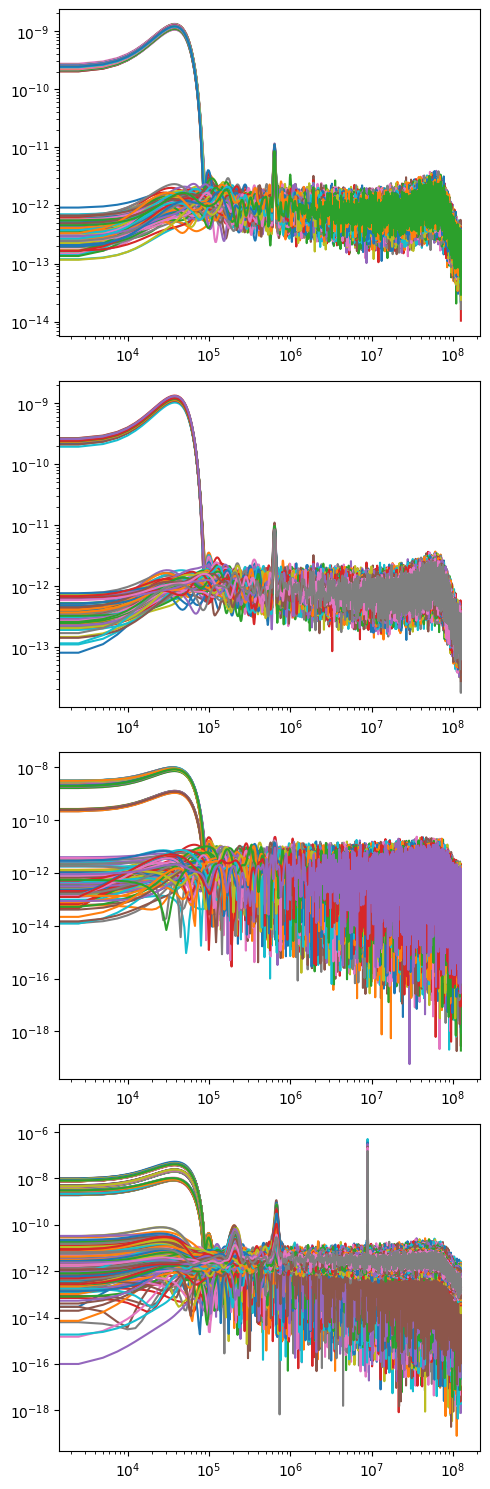

In [9]:
fig, ax = plt.subplots(4, 1, figsize = (5, 15))
from scipy.signal import welch
for i in range(len(cols)):
    f, x = welch(cols[i].x, 250000000, nperseg = 10000, nfft = 100000)
    if i < 101:
        ax[0].plot(f, x)
    elif i < 186:
        ax[1].plot(f, x)
    elif i < 289:
        ax[2].plot(f, x)
    else:
        ax[3].plot(f, x)
for i in range(len(n_cols)):
    n_f, n_x = welch(n_cols[i].x, 250000000, nperseg = 10000, nfft = 100000)
    if i < 102:
        ax[0].plot(n_f, n_x)
    elif i < 165:
        ax[1].plot(n_f, n_x)
    elif i < 267:
        ax[2].plot(n_f, n_x)
    else:
        ax[3].plot(n_f, n_x)
ax[0].set_xscale("log")
ax[1].set_xscale("log")
ax[2].set_xscale("log")
ax[3].set_xscale("log")
ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[2].set_yscale("log")
ax[3].set_yscale("log")
# ax[0].set_xlim(3e3, 5e5)
# ax[1].set_xlim(3e3, 5e5)
# ax[2].set_xlim(3e3, 5e5)
# ax[3].set_xlim(3e3, 5e5)
# ax[3].set_ylim(-0.5e-8, 6e-8)
plt.tight_layout()
plt.show()

### Attempting to calculate Signal to Noise Ratios a few different ways.

In [10]:
signal = []
n = []

sig = np.array([])
for i in range(len(cols)):
    f, x = welch(cols[i].x, 250000000, nperseg = 10000, nfft = 100000)
    if i < 101:
        sig = np.append(sig, np.max(x))
    elif i == 101:
        sig = np.append(sig, np.max(x))
        signal.append(sig)
        sig =  np.array([])
    elif i < 186:
        sig = np.append(sig, np.max(x))
    elif i == 186:
        sig = np.append(sig, np.max(x))
        signal.append(sig)
        sig =  np.array([])
    elif i < 289:
        sig = np.append(sig, np.max(x))
    elif i == 289:
        sig = np.append(sig, np.max(x))
        signal.append(sig)
        sig =  np.array([])
    elif i < len(cols) - 1:
        sig = np.append(sig, np.max(x))
    else:
        sig = np.append(sig, np.max(x))
        signal.append(sig)
        sig =  np.array([])
noi = np.array([])
for i in range(len(n_cols)):
    n_f, n_x = welch(n_cols[i].x, 250000000, nperseg = 10000, nfft = 100000)
    if i < 102:
        noi = np.append(noi, np.sum(n_x))
    elif i == 102:
        noi = np.append(noi, np.sum(n_x))
        n.append(noi)
        noi = np.array([])
    elif i < 165:
        noi = np.append(noi, np.sum(n_x))
    elif i == 165:
        noi = np.append(noi, np.sum(n_x))
        n.append(noi)
        noi = np.array([])
    elif i < 267:
        noi = np.append(noi, np.sum(n_x))
    elif i == 267:
        noi = np.append(noi, np.sum(n_x))
        n.append(noi)
        noi = np.array([])
    elif i < len(n_cols) - 1:
        noi = np.append(noi, np.sum(n_x))
    else: 
        noi = np.append(noi, np.sum(n_x))
        n.append(noi)
        noi = np.array([])

In [11]:
for i in range(len(signal)):
    print(np.mean(signal[i]))
    print(np.mean(n[i]))
    print(10 * np.log10(np.mean(signal[i]) / np.mean(n[i])))
    print()

1.183244361018116e-09
3.7902837249779894e-08
-15.055972772454147

1.1808152555521953e-09
3.843510218097632e-08
-15.125460846066414

7.398628776508728e-09
5.550970238871571e-08
-8.7521766159778

1.0007876191904684e-07
1.5196566420764448e-06
-11.814035485851694



### Unsuccessful. Trying a different approach.

In [12]:
def sin_40khz(t, Ampl, phase, freq):
    return np.abs(Ampl) * np.sin(freq * 2 * np.pi * t - phase)
amplitudes = []
phase_diff = []
freqs = []
for i, d in enumerate(laser.get_data()):
    amps = np.array([])
    phase = np.array([])
    freq = np.array([])
    d.apply("detrend", mode = "linear", inplace = True)
    popt, pcov = fit(sin_40khz, d.collection[0].t, d.collection[0].x, [0.02, 0, 4e4], bounds = ([0.005, -2 * np.pi, 3.95e4], [2, 2 * np.pi, 4.05e4]))
    # popt, pcov = fit(sin_40khz, d.collection[0].t, d.collection[0].x, [0.0216, 0, 4e4], bounds = ([0.02, -2 * np.pi, 3.95e4], [0.03, 2 * np.pi, 4.05e4]))
    amps = np.append(amps, popt[0])
    phase = np.append(phase, popt[1])
    freq = np.append(freq, popt[2])
    popt, pcov = fit(sin_40khz, d.collection[1].t, d.collection[1].x, [0.02, 0, 4e4], bounds = ([0.005, -2 * np.pi, 3.95e4], [2, 2 * np.pi, 4.05e4]))
    # popt, pcov = fit(sin_40khz, d.collection[1].t, d.collection[1].x, [0.025, 0, 4e4], bounds = ([0.02, -2 * np.pi, 3.95e4], [0.03, 2 * np.pi, 4.05e4]))
    amps = np.append(amps, popt[0])
    phase = np.append(phase, popt[1])
    freq = np.append(freq, popt[2])
    amplitudes.append(amps)
    phase_diff.append(phase % (2 * np.pi) / (2 * np.pi) * (1 / 4e4))
    freqs.append(freq)
    laser.set_data(ind = i)

In [13]:
cols = np.array([])
for i in range(len(laser.get_data())):
    # fig, ax = plt.subplots(1, 1)
    laser.set_data(ind = i, tmin = phase_diff[i][0])
    laser.get_data()[i].apply("detrend", mode = "linear", inplace = True)
    laser.get_data()[i].apply("lowpass", cutoff = 1e5, inplace = True)
    laser.get_data()[i].apply("bin_average", Npts = int(laser.get_data()[i].r / (1e5 * 2)))
    col1 = laser.get_data()[i].collection[0]
    laser.set_data(ind = i)
    laser.set_data(ind = i, tmin = phase_diff[i][1])
    laser.get_data()[i].apply("detrend", mode = "linear", inplace = True)
    laser.get_data()[i].apply("lowpass", cutoff = 1e5, inplace = True)
    laser.get_data()[i].apply("bin_average", Npts = int(laser.get_data()[i].r / (1e5 * 2)))
    col2 = laser.get_data()[i].collection[1]
    cols = np.append(cols, col1)
    cols = np.append(cols, col2)
    laser.set_data(ind = i)
    # ax.plot(col1.t, col1.x)
    # ax.plot(col2.t, col2.x)
    # ax.plot(col1.t, sin_40khz(col1.t, amplitudes[i][0], phase_diff[i][0], freqs[i][0]))
    # print("Amplitude 1:", amplitudes[i][0])
    # print("Amplitude 2:", amplitudes[i][1])
    # ax.plot(col2.t, sin_40khz(col2.t, amplitudes[i][1], phase_diff[i][1], freqs[i][1]))
    # fig.show()
    # plt.show()
n_cols = np.array([])
for i in range(len(noise.get_data())):
    # fig, ax = plt.subplots(1, 1)
    noise.set_data(ind = i, tmin = phase_diff[i][0])
    noise.get_data()[i].apply("detrend", mode = "linear", inplace = True)
    noise.get_data()[i].apply("lowpass", cutoff = 1e5, inplace = True)
    noise.get_data()[i].apply("bin_average", Npts = int(noise.get_data()[i].r / (1e5 * 2)))
    col1 = noise.get_data()[i].collection[0]
    noise.set_data(ind = i)
    noise.set_data(ind = i, tmin = phase_diff[i][1])
    noise.get_data()[i].apply("detrend", mode = "linear", inplace = True)
    noise.get_data()[i].apply("lowpass", cutoff = 1e5, inplace = True)
    noise.get_data()[i].apply("bin_average", Npts = int(noise.get_data()[i].r / (1e5 * 2)))
    col2 = noise.get_data()[i].collection[1]
    n_cols = np.append(n_cols, col1)
    n_cols = np.append(n_cols, col2)
    noise.set_data(ind = i)
    # ax.plot(col1.t, col1.x)
    # ax.plot(col2.t, col2.x)
    # ax.plot(col1.t, sin_40khz(col1.t, amplitudes[i][0], phase_diff[i][0], freqs[i][0]))
    # print("Amplitude 1:", amplitudes[i][0])
    # print("Amplitude 2:", amplitudes[i][1])
    # ax.plot(col2.t, sin_40khz(col2.t, amplitudes[i][1], phase_diff[i][1], freqs[i][1]))
    # fig.show()
    # plt.show()

In [14]:
signal = []
n = []

sig = np.array([])
for i in range(len(cols)):
    f, x = welch(cols[i].x, 250000000, nperseg = 10000, nfft = 100000)
    if i < 101:
        sig = np.append(sig, np.max(x))
    elif i == 101:
        sig = np.append(sig, np.max(x))
        signal.append(sig)
        sig =  np.array([])
    elif i < 186:
        sig = np.append(sig, np.max(x))
    elif i == 186:
        sig = np.append(sig, np.max(x))
        signal.append(sig)
        sig =  np.array([])
    elif i < 289:
        sig = np.append(sig, np.max(x))
    elif i == 289:
        sig = np.append(sig, np.max(x))
        signal.append(sig)
        sig =  np.array([])
    elif i < len(cols) - 1:
        sig = np.append(sig, np.max(x))
    else:
        sig = np.append(sig, np.max(x))
        signal.append(sig)
        sig =  np.array([])
noi = np.array([])
for i in range(len(n_cols)):
    n_f, n_x = welch(n_cols[i].x, 250000000, nperseg = 10000, nfft = 100000)
    if i < 102:
        noi = np.append(noi, np.sum(n_x))
    elif i == 102:
        noi = np.append(noi, np.sum(n_x))
        n.append(noi)
        noi = np.array([])
    elif i < 165:
        noi = np.append(noi, np.sum(n_x))
    elif i == 165:
        noi = np.append(noi, np.sum(n_x))
        n.append(noi)
        noi = np.array([])
    elif i < 267:
        noi = np.append(noi, np.sum(n_x))
    elif i == 267:
        noi = np.append(noi, np.sum(n_x))
        n.append(noi)
        noi = np.array([])
    elif i < len(n_cols) - 1:
        noi = np.append(noi, np.sum(n_x))
    else: 
        noi = np.append(noi, np.sum(n_x))
        n.append(noi)
        noi = np.array([])

In [15]:
for i in range(len(signal)):
    print(np.mean(signal[i]))
    print(np.mean(n[i]))
    print(10 * np.log10(np.mean(signal[i]) / np.mean(n[i])))
    print()

1.173420297169255e-09
3.641404161485563e-11
15.081847119320638

1.1711340689645483e-09
3.4720797772886343e-11
15.280169197197182

7.339686992949729e-09
8.773620923306062e-11
19.224986732946505

2.798827809816252e-08
3.697656450621968e-10
18.790496221309795



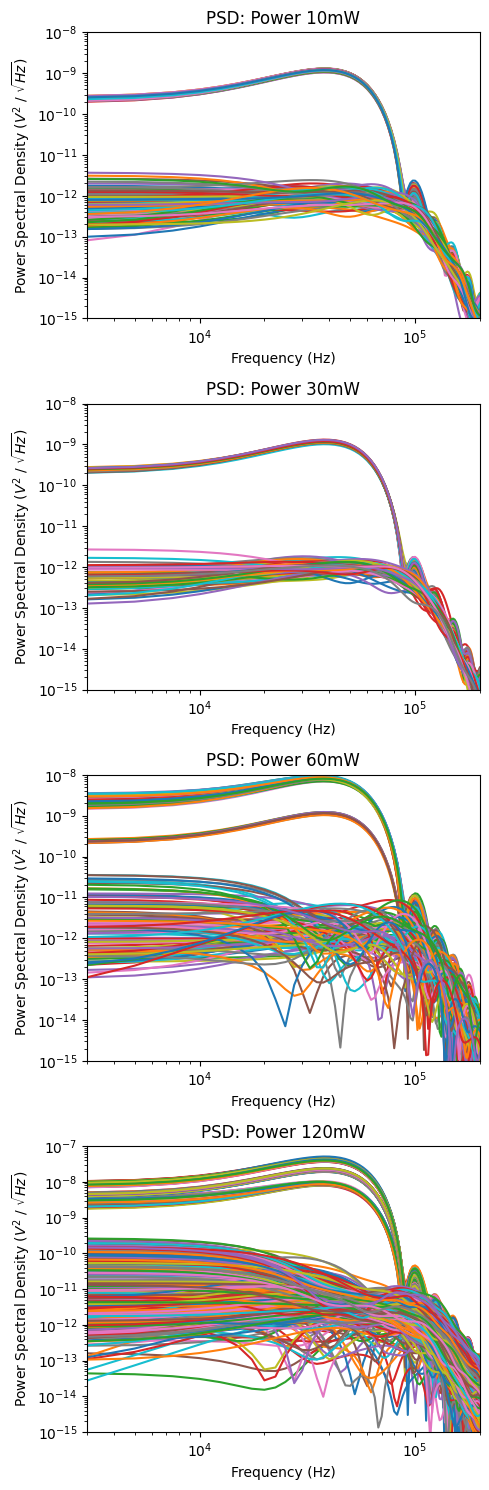

In [22]:
fig, ax = plt.subplots(4, 1, figsize = (5, 15))
ax[0].set_xlim(3e3, 2e5)
ax[1].set_xlim(3e3, 2e5)
ax[2].set_xlim(3e3, 2e5)
ax[3].set_xlim(3e3, 2e5)
ax[0].set_ylim(1e-15, 1e-8)
ax[1].set_ylim(1e-15, 1e-8)
ax[2].set_ylim(1e-15, 1e-8)
ax[3].set_ylim(1e-15, 1e-7)

from scipy.signal import welch
for i in range(len(cols)):
    f, x = welch(cols[i].x, 250000000, nperseg = 10000, nfft = 100000)
    if i < 101:
        ax[0].plot(f, x)
    elif i < 186:
        ax[1].plot(f, x)
    elif i < 289:
        ax[2].plot(f, x)
    else:
        ax[3].plot(f, x)
for i in range(len(n_cols)):
    n_f, n_x = welch(n_cols[i].x, 250000000, nperseg = 10000, nfft = 100000)
    if i < 102:
        ax[0].plot(n_f, n_x)
    elif i < 165:
        ax[1].plot(n_f, n_x)
    elif i < 267:
        ax[2].plot(n_f, n_x)
    else:
        ax[3].plot(n_f, n_x)
ax[0].set_xscale("log")
ax[1].set_xscale("log")
ax[2].set_xscale("log")
ax[3].set_xscale("log")
ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[2].set_yscale("log")
ax[3].set_yscale("log")
ax[0].set_title("PSD: Power 10mW")
ax[1].set_title("PSD: Power 30mW")
ax[2].set_title("PSD: Power 60mW")
ax[3].set_title("PSD: Power 120mW")
ax[0].set_xlabel("Frequency (Hz)")
ax[1].set_xlabel("Frequency (Hz)")
ax[2].set_xlabel("Frequency (Hz)")
ax[3].set_xlabel("Frequency (Hz)")
ax[0].set_ylabel("Power Spectral Density ($V^{2}$ / $\sqrt{Hz}$)")
ax[1].set_ylabel("Power Spectral Density ($V^{2}$ / $\sqrt{Hz}$)")
ax[2].set_ylabel("Power Spectral Density ($V^{2}$ / $\sqrt{Hz}$)")
ax[3].set_ylabel("Power Spectral Density ($V^{2}$ / $\sqrt{Hz}$)")
plt.tight_layout()
plt.show()

1.173420297169255e-09
3.641404161485563e-11
1.1711340689645483e-09
3.4720797772886343e-11
7.339686992949729e-09
8.773620923306062e-11
2.798827809816252e-08
3.697656450621968e-10


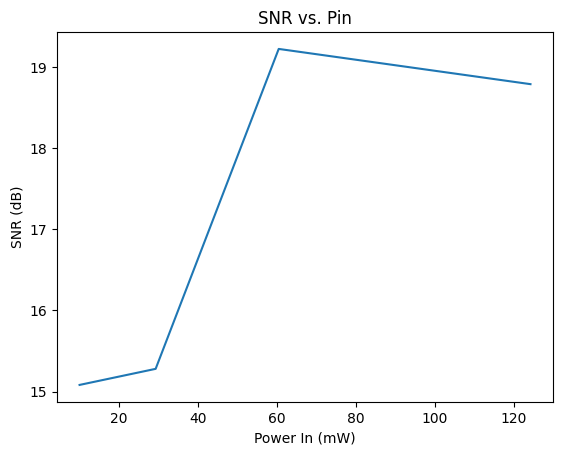

In [25]:
snrs = []
for i in range(len(signal)):
    print(np.mean(signal[i]))
    print(np.mean(n[i]))
    snrs.append(10 * np.log10(np.mean(signal[i]) / np.mean(n[i])))
fig, ax = plt.subplots(1, 1)
ax.plot([10.12, 29.37, 60.51, 124.22], snrs)
ax.set_title("SNR vs. Pin")
ax.set_xlabel("Power In (mW)")
ax.set_ylabel("SNR (dB)")
plt.show()